# Data Exploration

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'D:\Data\Projects\Business Analytics\E-Commerce Data')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df = pd.read_csv('dfclean.csv', parse_dates=['InvoiceDate'])
print(df.shape)
df.head()

(401604, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850,United Kingdom


### Timeframe

In [5]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [6]:
# Order by time of day
df.InvoiceDate.dt.hour.value_counts()

12    72213
13    64051
14    54194
11    49525
15    45641
10    38725
16    24618
9     22446
17    13604
8      8789
19     3423
18     3104
20      847
7       383
6        41
Name: InvoiceDate, dtype: int64

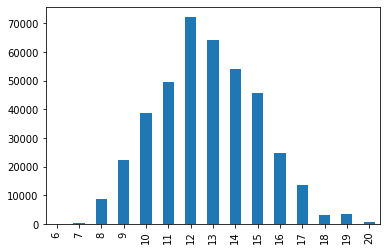

In [7]:
df.InvoiceDate.dt.hour.value_counts().sort_index().plot(kind='bar');

### Orders

In [8]:
# Invoice
df['Invoice'] = df.UnitPrice * df.Quantity

In [9]:
df.groupby('Country').InvoiceNo.nunique().sum()

22190

In [10]:
# Different products in one order
df.groupby('InvoiceNo').size().sort_values(ascending=False).head(10)

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
567656    421
567183    392
575607    377
571441    364
570488    353
dtype: int64

In [11]:
df.groupby('InvoiceNo').size().mean()

18.098422712933754

In [12]:
# Orders per customer (including cancellations)
df.groupby('CustomerID').InvoiceNo.nunique().\
sort_values(ascending=False).head(10)

CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
15311    118
12971     89
14527     86
13408     81
14646     77
Name: InvoiceNo, dtype: int64

In [13]:
# cancelled orders
df[df.InvoiceNo.str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527,United Kingdom,-27.500
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311,United Kingdom,-4.650
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548,United Kingdom,-19.800
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548,United Kingdom,-6.960
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548,United Kingdom,-6.960
...,...,...,...,...,...,...,...,...,...
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.830,14397,United Kingdom,-9.130
401243,C581499,M,Manual,-1,2011-12-09 10:28:00,224.690,15498,United Kingdom,-224.690
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.950,15311,United Kingdom,-54.750
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.250,17315,United Kingdom,-1.250


### Discounts

In [14]:
df[df.StockCode == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527,United Kingdom,-27.500
6596,C537164,D,Discount,-1,2010-12-05 13:21:00,29.290,14527,United Kingdom,-29.290
9977,C537597,D,Discount,-1,2010-12-07 12:34:00,281.000,15498,United Kingdom,-281.000
12450,C537857,D,Discount,-1,2010-12-08 16:00:00,267.120,17340,United Kingdom,-267.120
20274,C538897,D,Discount,-1,2010-12-15 09:14:00,5.760,16422,United Kingdom,-5.760
...,...,...,...,...,...,...,...,...,...
357248,C577227,D,Discount,-1,2011-11-18 12:06:00,19.820,14527,United Kingdom,-19.820
357249,C577227,D,Discount,-1,2011-11-18 12:06:00,16.760,14527,United Kingdom,-16.760
367994,C578239,D,Discount,-1,2011-11-23 12:29:00,26.330,14912,Italy,-26.330
384059,C579884,D,Discount,-1,2011-11-30 17:34:00,20.530,14527,United Kingdom,-20.530


In [15]:
df[(df.Description == 'Manual') & (df.InvoiceNo.str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
14111,C538124,M,Manual,-4,2010-12-09 15:43:00,0.500,15329,United Kingdom,-2.000
19064,C538806,M,Manual,-1,2010-12-14 11:59:00,4.250,15181,United Kingdom,-4.250
28432,C540271,M,Manual,-1,2011-01-06 11:51:00,1126.000,12503,Spain,-1126.000
28722,C540307,M,Manual,-2,2011-01-06 12:58:00,21.950,15823,United Kingdom,-43.900
36903,C541284,M,Manual,-36,2011-01-17 12:45:00,0.870,17744,United Kingdom,-31.320
...,...,...,...,...,...,...,...,...,...
387128,C580263,M,Manual,-16,2011-12-02 12:43:00,0.290,12536,France,-4.640
389559,C580510,M,Manual,-1,2011-12-04 13:48:00,1.250,14456,United Kingdom,-1.250
396440,C581009,M,Manual,-1,2011-12-07 09:15:00,125.000,16971,United Kingdom,-125.000
397435,C581145,M,Manual,-1,2011-12-07 13:48:00,9.950,17490,United Kingdom,-9.950


### Countries

In [16]:
# Customers per country
df.groupby('Country').CustomerID.nunique().sort_values(ascending = False).head(20)

Country
United Kingdom     3950
Germany              95
France               87
Spain                31
Belgium              25
Switzerland          21
Portugal             19
Italy                15
Finland              12
Austria              11
Norway               10
Channel Islands       9
Denmark               9
Australia             9
Netherlands           9
Cyprus                8
Japan                 8
Sweden                8
Poland                6
Unspecified           4
Name: CustomerID, dtype: int64

In [17]:
# Orders per country
df.groupby('Country').InvoiceNo.nunique().sort_values(ascending=False).head(20)

Country
United Kingdom     19857
Germany              603
France               458
EIRE                 319
Belgium              119
Spain                105
Netherlands          101
Switzerland           71
Portugal              70
Australia             69
Italy                 55
Finland               48
Sweden                46
Norway                40
Channel Islands       33
Japan                 28
Poland                24
Denmark               21
Cyprus                20
Austria               19
Name: InvoiceNo, dtype: int64

In [18]:
# Spending per country
df.groupby('Country')['Invoice'].sum().sort_values(ascending = False).head(10)

Country
United Kingdom   6747156.154
Netherlands       284661.540
EIRE              250001.780
Germany           221509.470
France            196626.050
Australia         137009.770
Switzerland        55739.400
Spain              54756.030
Belgium            40910.960
Sweden             36585.410
Name: Invoice, dtype: float64

### The customers

In [19]:
# How many customers are there?
df.CustomerID.nunique()

4372

In [20]:
# Top 10 customers by number of items
df.groupby('CustomerID').size().sort_values(ascending = False).head(10)

CustomerID
17841    7812
14911    5898
14096    5128
12748    4459
14606    2759
15311    2478
14646    2085
13089    1853
13263    1667
14298    1640
dtype: int64

In [21]:
# Top 10 customers by spending
df.groupby(['Country','CustomerID'])['Invoice'].sum().sort_values(ascending = False).head(10)

Country         CustomerID
Netherlands     14646        279489.020
United Kingdom  18102        256438.490
                17450        187322.170
EIRE            14911        132458.730
Australia       12415        123725.450
EIRE            14156        113214.590
United Kingdom  17511         88125.380
                16684         65892.080
                13694         62690.540
                15311         59284.190
Name: Invoice, dtype: float64

In [22]:
# Top 10 countries by spending
df.groupby('Country')['Invoice'].sum().sort_values(ascending = False).head(10)

Country
United Kingdom   6747156.154
Netherlands       284661.540
EIRE              250001.780
Germany           221509.470
France            196626.050
Australia         137009.770
Switzerland        55739.400
Spain              54756.030
Belgium            40910.960
Sweden             36585.410
Name: Invoice, dtype: float64

In [23]:
# No of customers per country
df.groupby('Country')['CustomerID'].nunique().sort_values(ascending= False).head(10)

Country
United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: CustomerID, dtype: int64

In [24]:
df.groupby('CustomerID')['InvoiceDate'].min().sort_values().head(5)

CustomerID
17850   2010-12-01 08:26:00
13047   2010-12-01 08:34:00
12583   2010-12-01 08:45:00
13748   2010-12-01 09:00:00
15100   2010-12-01 09:09:00
Name: InvoiceDate, dtype: datetime64[ns]

In [25]:
# First order of customer
newc= df.groupby('CustomerID')['InvoiceDate'].min().reset_index()

In [26]:
newc

,CustomerID,InvoiceDate
0,12346,2011-01-18 10:01:00
1,12347,2010-12-07 14:57:00
2,12348,2010-12-16 19:09:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
4367,18280,2011-03-07 09:52:00
4368,18281,2011-06-12 10:53:00
4369,18282,2011-08-05 13:35:00
4370,18283,2011-01-06 14:14:00


In [27]:
a = newc.groupby(by = [newc.InvoiceDate.dt.month]).count()

In [28]:
a

,CustomerID,InvoiceDate
InvoiceDate,,
1,421,421
2,380,380
3,440,440
4,299,299
5,279,279
6,235,235
7,191,191
8,167,167
9,298,298


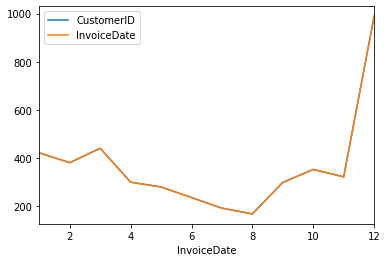

In [29]:
a.plot()

In [30]:
# Favorite products per country
df.groupby('Country')['Description'].value_counts().sort_values(ascending=False)

Country         Description                       
United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER    1969
                REGENCY CAKESTAND 3 TIER              1564
                JUMBO BAG RED RETROSPOT               1502
                ASSORTED COLOUR BIRD ORNAMENT         1330
                PARTY BUNTING                         1320
                                                      ... 
Italy           OFFICE MUG WARMER CHOC+BLUE              1
                OFFICE MUG WARMER BLACK+SILVER           1
                NOVELTY BISCUITS CAKE STAND 3 TIER       1
                Manual                                   1
                PINK HEART SHAPE EGG FRYING PAN          1
Name: Description, Length: 19361, dtype: int64

In [31]:
df[df.Country == 'Netherlands']['Description'].value_counts().sort_values(ascending=False).head()

POSTAGE                                39
SPACEBOY LUNCH BOX                     28
ROUND SNACK BOXES SET OF4 WOODLAND     25
DOLLY GIRL LUNCH BOX                   22
SPACEBOY BIRTHDAY CARD                 17
Name: Description, dtype: int64

In [32]:
df[df.Country == 'EIRE']['Description'].value_counts().sort_values(ascending=False).head()

CARRIAGE                              99
REGENCY CAKESTAND 3 TIER              69
ROSES REGENCY TEACUP AND SAUCER       48
WHITE HANGING HEART T-LIGHT HOLDER    41
VINTAGE SNAP CARDS                    38
Name: Description, dtype: int64

In [33]:
df[df.Country == 'United Kingdom']['Description'].value_counts().sort_values(ascending=False).head()

WHITE HANGING HEART T-LIGHT HOLDER    1969
REGENCY CAKESTAND 3 TIER              1564
JUMBO BAG RED RETROSPOT               1502
ASSORTED COLOUR BIRD ORNAMENT         1330
PARTY BUNTING                         1320
Name: Description, dtype: int64

In [34]:
# Lieblingsprodukte des besten Kunden 14646 aus den Niederlanden
df[df.CustomerID == '14646']['Description'].value_counts().sort_values(ascending = False).head(10)

Series([], Name: Description, dtype: int64)

In [35]:
df[df.Invoice > 500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.820,16029,United Kingdom,733.440
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.370,16029,United Kingdom,647.040
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.370,16029,United Kingdom,647.040
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.450,16029,United Kingdom,626.400
182,536387,21731,RED TOADSTOOL LED NIGHT LIGHT,432,2010-12-01 09:58:00,1.250,16029,United Kingdom,540.000
...,...,...,...,...,...,...,...,...,...
400780,581457,23401,RUSTIC MIRROR WITH LACE HEART,126,2011-12-08 18:43:00,4.150,18102,United Kingdom,522.900
400781,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.720,17949,United Kingdom,1080.000
400782,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.720,17949,United Kingdom,864.000
401131,581483,23843,PAPER CRAFT LITTLE BIRDIE,80995,2011-12-09 09:15:00,2.080,16446,United Kingdom,168469.600


### Statistical parameters for Quantity and UnitPrice

In [36]:
df.describe()

,Quantity,UnitPrice,CustomerID,Invoice
count,401604.000,401604.000,401604.000,401604.000
mean,12.183,3.474,15281.161,20.614
std,250.283,69.764,1714.006,430.352
min,-80995.000,0.000,12346.000,-168469.600
25%,2.000,1.250,13939.000,4.250
50%,5.000,1.950,15145.000,11.700
75%,12.000,3.750,16784.000,19.800
max,80995.000,38970.000,18287.000,168469.600


In [37]:
# Errors in Quantity, UnitPrice

In [38]:
df.UnitPrice.value_counts().sort_index().tail(10)

2382.920     2
2500.000     1
3060.600     1
3155.950     2
3949.320     2
4161.060     3
4287.630     1
6930.000     1
8142.750     2
38970.000    1
Name: UnitPrice, dtype: int64

In [39]:
df.loc[df.CustomerID == 15098]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
157395,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.950,15098,United Kingdom,297.000
157405,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.500,15098,United Kingdom,38970.000
157406,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.000,15098,United Kingdom,-38970.000
157407,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.500,15098,United Kingdom,649.500
157417,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2011-06-10 15:39:00,4.950,15098,United Kingdom,-297.000


In [40]:
df.loc[(df.InvoiceNo == '581483')|(df.InvoiceNo == 'C581484')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
401131,581483,23843,PAPER CRAFT LITTLE BIRDIE,80995,2011-12-09 09:15:00,2.080,16446,United Kingdom,168469.600
401132,C581484,23843,PAPER CRAFT LITTLE BIRDIE,-80995,2011-12-09 09:27:00,2.080,16446,United Kingdom,-168469.600


Many typos in Quantity and UnitPrice, which were subsequently cancelled. Not all errors can be traced, though, like you can see above. 